# Assignment 1

### Glory Odeyemi

#### 28-Jan-2023

### Install libraries

You can skip this step if you already have these libraries installed.

In [1]:
!pip install pytrec-eval-terrier
!pip install nltk

### Import libraries

This is an important step because some of the codes that depends on these libraries will give an error if the libraries are not imported.

In [2]:
import nltk
import multiprocessing as mp
import time
import itertools
from utils.k_success import top_k_words, success_at_k, average_k
import matplotlib.pyplot as plt
%matplotlib inline

### Download Wordnet

Wordnet is the dictionary used for this project.

In [3]:
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /Users/new/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/new/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [4]:
from nltk.corpus import wordnet as wn
print("Total number of words in Wordnet = ", len(list(wn.words())))

Total number of words in Wordnet =  147306


### Import Birkbeck corpus

Birkbeck spelling error corpus was used for this project. You can find it [here](https://ota.bodleian.ox.ac.uk/repository/xmlui/handle/20.500.12024/0643).

Two files, [SHEFFIELDDAT.643](https://github.com/gloryodeyemi/COMP_8730_Assignment1/blob/main/Data/SHEFFIELDDAT.643) and [FAWTHROP1DAT.643](https://github.com/gloryodeyemi/COMP_8730_Assignment1/blob/main/Data/FAWTHROP1DAT.643), out of the Birkbeck spelling error corpus by Roger Mitton was used.

In [5]:
birkbeck_data = []
with open('Data/FAWTHROP1DAT.643', 'r') as file_data1:
    for line in file_data1:
        data = line.split()
        birkbeck_data.append(data)
    
with open('Data/SHEFFIELDDAT.643', 'r') as file_data2:
    for line in file_data2:
        data = line.split()
        birkbeck_data.append(data)

In [6]:
birkbeck_data = sorted(birkbeck_data)
birkbeck_data[:10]

[['ABATTOIR', 'ABBATOIR'],
 ['ABHORRENCE', 'ABHORENCE'],
 ['ABILITY', 'ABILTY'],
 ['ABROAD', 'ABRAOD'],
 ['ABSENCE', 'ABSENSE'],
 ['ABSORBENT', 'ABSORBANT'],
 ['ABSORPTION', 'ABSORBTION'],
 ['ACADEMIC', 'ACEDEMIC'],
 ['ACCEDE', 'ACCEED'],
 ['ACCELERATE', 'ACELLERATE']]

In [7]:
print("Total number of words in Birbeck corpus = ", len(birkbeck_data))

Total number of words in Birbeck corpus =  1193


### Getting the top k words

* Top-k words are the top most similar or least distant list of words that are retrieved by the Minimum Edit Distance (MED) from the Wordnet dictionary.
* For every incorrect word in the birkbeck_data corpus, top-k words are returned, where k={1,5,10}.

#### Parallelization
According to [this article](https://python.plainenglish.io/parallelization-in-python-e5ac80b32b22), "Parallelization in Python enables the developer to run several parts of a program at the same time. It is intended to decrease the complete processing time. The multiprocessing module is used to run free parallel processes."

**Sample test:** The first 10 items in the birkbeck corpus will be used to test the parallelization.


* Without parallelization


In [8]:
start_time = time.time()
top_k_result = []
for data_row in birkbeck_data[:10]:
    top_k_result.append(top_k_words(data_row))
    
print("--- Without parallelization: %s seconds ---" % (time.time() - start_time))

--- Without parallelization: 28.83577799797058 seconds ---


* With parallelization

In [9]:
pool = mp.Pool()
start_time = time.time()
top_k_result = []
top_k_result.append(pool.map(top_k_words, birkbeck_data[:10]))
    
print("--- With parallelization: %s seconds ---" % (time.time() - start_time))

--- With parallelization: 7.3173768520355225 seconds ---


**Getting the top k-words for all incorrect token in the birkbeck corpus.**

In [10]:
top_k_result = []
start_time = time.time()
top_k_result.append(pool.map(top_k_words, birkbeck_data))

top_k_result[0][-5:]

[{'correct_word': 'yearned',
  'incorrect_word': 'yerned',
  'top_1': ['ferned'],
  'top_5': ['ferned', 'burned', 'corned', 'darned', 'earned'],
  'top_10': ['ferned',
   'burned',
   'corned',
   'darned',
   'earned',
   'horned',
   'learned',
   'merged',
   'permed',
   'turned']},
 {'correct_word': 'yeoman',
  'incorrect_word': 'yoman',
  'top_1': ['roman'],
  'top_5': ['roman', 'yuman', 'oman', 'soman', 'woman'],
  'top_10': ['roman',
   'yuman',
   'oman',
   'soman',
   'woman',
   'yeoman',
   'comal',
   'human',
   'norman',
   'omani']},
 {'correct_word': 'yield',
  'incorrect_word': 'yeild',
  'top_1': ['held'],
  'top_5': ['held', 'mild', 'veiled', 'weird', 'wild'],
  'top_10': ['held',
   'mild',
   'veiled',
   'weird',
   'wild',
   'yelled',
   'build',
   'child',
   'eld',
   'gild']},
 {'correct_word': 'zealous',
  'incorrect_word': 'zelous',
  'top_1': ['zealous'],
  'top_5': ['zealous', 'cerous', 'jealous', 'pilous', 'serous'],
  'top_10': ['zealous',
   'cerous

### Getting the success at k

Success at k (s@k) measures whether the correct spell of the token happens to be in the top-k (where k={1,5,10}) list of tokens. 

In [11]:
success = success_at_k(top_k_result[0])
dict(itertools.islice(reversed(success.items()), 5))

{'zeenith': {'success_at_1': 1, 'success_at_5': 1, 'success_at_10': 1},
 'zelous': {'success_at_1': 1, 'success_at_5': 1, 'success_at_10': 1},
 'yeild': {'success_at_1': 0, 'success_at_5': 0, 'success_at_10': 0},
 'yoman': {'success_at_1': 0, 'success_at_5': 0, 'success_at_10': 1},
 'yerned': {'success_at_1': 0, 'success_at_5': 0, 'success_at_10': 0}}

### Getting the average success at k

In [12]:
avg_success = average_k(success)
avg_success

{'success_at_1': 0.611864406779661,
 'success_at_5': 0.7974576271186441,
 'success_at_10': 0.8169491525423729}

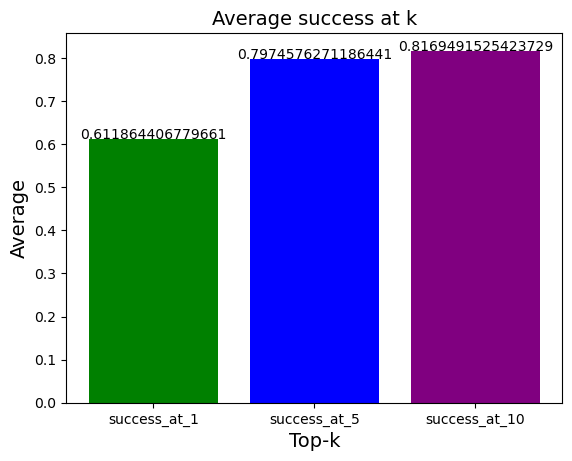

In [13]:
# bar chart showing the avegare success at k
x = avg_success.keys()
y = avg_success.values()

colors = ['green','blue','purple']
plt.bar(x, y, color=colors)
plt.title('Average success at k', fontsize=14)
plt.xlabel('Top-k', fontsize=14)
plt.ylabel('Average', fontsize=14)
plt.grid(False)

for i in range(len(x)):
        plt.text(i,list(y)[i],list(y)[i], ha='center')
        
plt.savefig('average.png',dpi=400)
plt.show()